### Ibad Ur Rahman
### 23MDBCS421
### Data Science
### Semester 5th
### Lab Task 8
### Dr.Tariq Sadad

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
!pip install opendatasets

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arkhoshghalb/twitter-sentiment-analysis-hatred-speech")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'twitter-sentiment-analysis-hatred-speech' dataset.
Path to dataset files: /kaggle/input/twitter-sentiment-analysis-hatred-speech


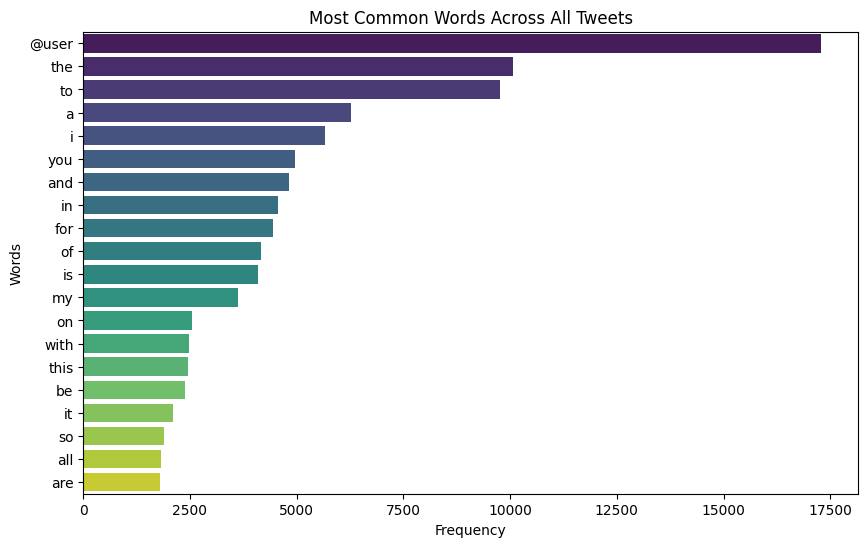

In [18]:
from collections import Counter

# Get all words from the original tweets
all_words = ' '.join(dataset['tweet']).split()

# Get the most common words
most_common_all = Counter(all_words).most_common(20)

# Create a bar plot for most common words
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[1] for word in most_common_all], y=[word[0] for word in most_common_all], palette='viridis')
plt.title('Most Common Words Across All Tweets')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             31962 non-null  int64 
 1   label          31962 non-null  int64 
 2   tweet          31962 non-null  object
 3   tweet_length   31962 non-null  int64 
 4   cleaned_tweet  31962 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.2+ MB


In [20]:
dataset = dataset.drop(["id"], axis = 1)

In [21]:
dataset.head(10)

,label,tweet,tweet_length,cleaned_tweet
0,0,@user when a father is dysfunctional and is s...,102,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,122,thanks for credit i cant use cause they don...
2,0,bihday your majesty,21,bihday your majesty
3,0,#model i love u take with u all the time in ...,86,i love u take with u all the time in urð ðð...
4,0,factsguide: society now #motivation,39,factsguide society now
5,0,[2/2] huge fan fare and big talking before the...,116,huge fan fare and big talking before they lea...
6,0,@user camping tomorrow @user @user @user @use...,74,camping tomorrow dannyâ
7,0,the next school year is the year for exams.ð...,143,the next school year is the year for examsð ca...
8,0,we won!!! love the land!!! #allin #cavs #champ...,87,we won love the land â
9,0,@user @user welcome here ! i'm it's so #gr...,50,welcome here im its so


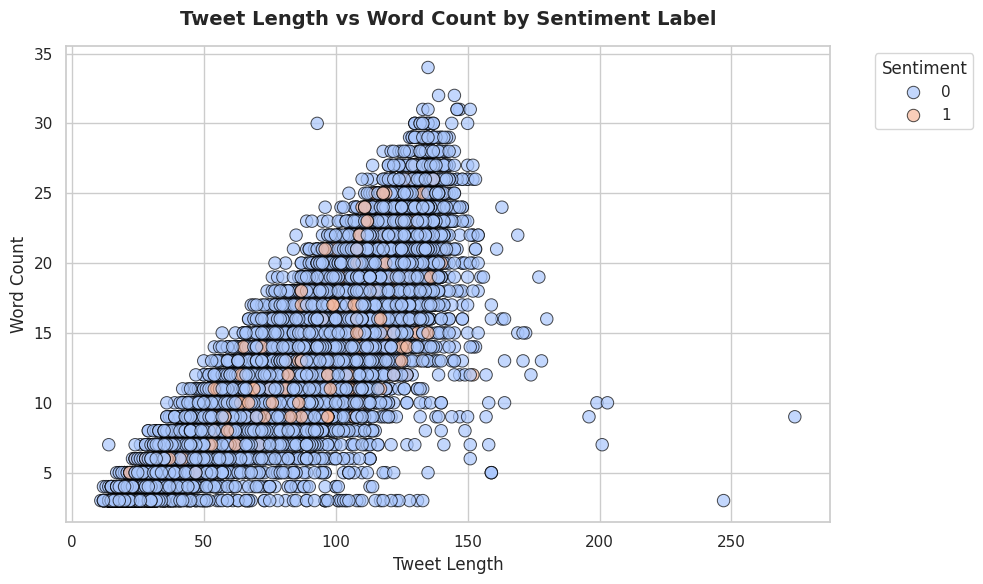

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of words in each tweet
dataset['word_count'] = dataset['tweet'].apply(lambda x: len(str(x).split()))

# Set style and color palette
sns.set(style="whitegrid", palette="husl")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=dataset,
    x='tweet_length',
    y='word_count',
    hue='label',
    palette='coolwarm',   # Change color palette here
    s=80,                 # Increase point size
    alpha=0.7,            # Transparency
    edgecolor='black'     # Outline for better visibility
)

plt.title('Tweet Length vs Word Count by Sentiment Label', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Tweet Length', fontsize=12)
plt.ylabel('Word Count', fontsize=12)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [26]:
y = dataset.iloc[:, 0]

In [28]:
y = dataset['label']

In [29]:
x = dataset.iloc[:, 1:]

In [33]:
x1 = dataset.drop(['label'], axis=1)

In [34]:
x1

,tweet,tweet_length,cleaned_tweet,word_count
0,@user when a father is dysfunctional and is s...,102,when a father is dysfunctional and is so sel...,18
1,@user @user thanks for #lyft credit i can't us...,122,thanks for credit i cant use cause they don...,19
2,bihday your majesty,21,bihday your majesty,3
3,#model i love u take with u all the time in ...,86,i love u take with u all the time in urð ðð...,14
4,factsguide: society now #motivation,39,factsguide society now,4
...,...,...,...,...
31957,ate @user isz that youuu?ðððððð...,68,ate isz that youuuðððððððððâï,5
31958,to see nina turner on the airwaves trying to...,131,to see nina turner on the airwaves trying to...,23
31959,listening to sad songs on a monday morning otw...,63,listening to sad songs on a monday morning otw...,13
31960,"@user #sikh #temple vandalised in in #calgary,...",67,vandalised in in condemns act,10


In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [39]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train_tfidf.toarray(),y_train) # Use the vectorized features and convert to dense array

GaussianNB()

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
# We will use the 'cleaned_tweet' column for vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features

# Fit and transform the vectorizer on the training data
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train['cleaned_tweet'])

# Transform the test data
x_test_tfidf = tfidf_vectorizer.transform(x_test['cleaned_tweet'])

print("Shape of x_train_tfidf:", x_train_tfidf.shape)
print("Shape of x_test_tfidf:", x_test_tfidf.shape)

Shape of x_train_tfidf: (25569, 5000)
Shape of x_test_tfidf: (6393, 5000)


In [41]:
print("Naive Bayes score: ",nb.score(x_test_tfidf.toarray(), y_test))

Naive Bayes score:  0.6419521351478179


In [43]:
y_pred = nb.predict(x_test_tfidf.toarray())

In [44]:
print('Accuracy:', accuracy_score (y_test, y_pred))


Accuracy: 0.6419521351478179


In [45]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report (y_test, y_pred))

Confusion Matrix:
[[3811 2165]
 [ 124  293]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.64      0.77      5976
           1       0.12      0.70      0.20       417

    accuracy                           0.64      6393
   macro avg       0.54      0.67      0.49      6393
weighted avg       0.91      0.64      0.73      6393

